# Imputation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

In [2]:
df = pd.DataFrame(
    data={
        'gender':np.random.binomial(1, .6, 100),
        'height':np.random.normal(0, 10, 100),
        'noise': np.random.normal(0, 2, 100),
    }
)

df.head()

,gender,height,noise
0,1,-8.967322,-0.145919
1,0,-2.000930,4.677720
2,1,-1.211431,-1.994245
3,1,8.648658,0.161832
4,1,10.363410,2.959963


In [3]:
df = (
    df.assign(
        height = df.height + df.gender.apply(
            lambda g : 150 if g else 180
        ),
        height_with_75_nan = df.height.apply(
            lambda x : x if np.random.binomial(1, .25, 1)[0] else np.nan
        ),
        
    )
)
df['weight'] = df.height + df.noise - 110
df.sample(8)

,gender,height,noise,height_with_75_nan,weight
21,0,183.777637,-1.084427,NaN,72.693209
4,1,160.363410,2.959963,NaN,53.323374
73,1,133.307275,0.629145,-16.692725,23.936420
89,0,181.974570,-0.949781,NaN,71.024789
60,1,146.766728,-0.089723,NaN,36.677005
55,1,151.666195,-0.960383,NaN,40.705811
61,0,177.472362,-3.390511,NaN,64.081852
59,1,135.104167,-0.443334,NaN,24.660833


In [4]:
df.isna().sum()

gender                 0
height                 0
noise                  0
height_with_75_nan    74
weight                 0
dtype: int64

## Setting missing values to 0

In [5]:
df['height_75_zero_imputed'] = df.height_with_75_nan.fillna(0)

In [6]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

X, y = df[['height_75_zero_imputed']], df.weight
reg = Ridge()
reg.fit(X, y)
mean_squared_error(y, reg.predict(X))

287.01184393727095

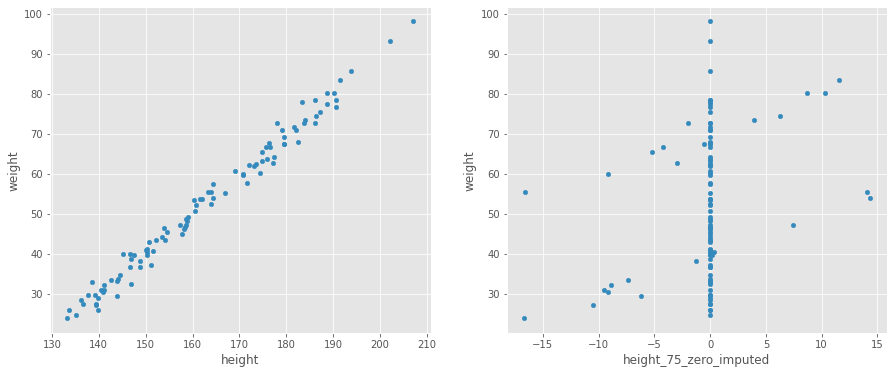

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

df.plot(
    kind='scatter',
    x='height',
    y='weight',
    ax=axs[0]
)

df.plot(
    kind='scatter',
    x='height_75_zero_imputed',
    y='weight',
    ax=axs[1]
)

In [8]:
df2 = df.copy()
df2.head()

,gender,height,noise,height_with_75_nan,weight,height_75_zero_imputed
0,1,141.032678,-0.145919,NaN,30.886759,0.00000
1,0,177.999070,4.677720,-2.00093,72.676790,-2.00093
2,1,148.788569,-1.994245,NaN,36.794324,0.00000
3,1,158.648658,0.161832,NaN,48.810490,0.00000
4,1,160.363410,2.959963,NaN,53.323374,0.00000


In [10]:
df2.height_75_zero_imputed = df2.height_75_zero_imputed.replace(0, -1)
df2.head()

,gender,height,noise,height_with_75_nan,weight,height_75_zero_imputed
0,1,141.032678,-0.145919,NaN,30.886759,-1.00000
1,0,177.999070,4.677720,-2.00093,72.676790,-2.00093
2,1,148.788569,-1.994245,NaN,36.794324,-1.00000
3,1,158.648658,0.161832,NaN,48.810490,-1.00000
4,1,160.363410,2.959963,NaN,53.323374,-1.00000


### Decision Tree model

In [11]:
from sklearn.tree import DecisionTreeRegressor

X_dt = df2[['height_75_zero_imputed']]

dt = DecisionTreeRegressor()
dt.fit(X_dt, y)
mean_squared_error(y, dt.predict(X_dt))

227.06911011839824